# Importando librerías

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# Importar árboles de ensacado y clasificadores de bosques aleatorios
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Cargando el dataset

In [138]:
col_names = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
'Proline']

In [139]:
# Otra forma de cargar los datos cuando están en un enlace público
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                  header = None, names = col_names)
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Explorando el dataset

In [140]:
# Imprimir cuántas clases
print('Class labels', np.unique(df['Class label']))

Class labels [1 2 3]


In [141]:
# Las clases no están equilibradas
df['Class label'].value_counts(dropna = False)

2    71
1    59
3    48
Name: Class label, dtype: int64

# Dividiendo el dataset en 'trainning' y 'test'

In [142]:
# Organizar los datos en la matriz de características y el vector de destino
X = df.loc[:, df.columns[(df.columns != 'Class label')]]
y = df.loc[:, 'Class label'].values

In [143]:
# Dividir en conjuntos de prueba y entrenamiento
# Proporcionar la matriz de etiquetas de clase y como argumento para estratificar asegura a ambos
# el conjunto de entrenamiento y los conjuntos de datos de prueba tienen las mismas proporciones de clase que el
# conjunto de datos original
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [144]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 41, 2: 50, 3: 33}

# Estandarizando los datos

In [145]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 1) Regresión Logística: One vs All

In [146]:
from sklearn.multiclass import OneVsRestClassifier

Definiendo el modelo para L1 y L2

In [147]:
# Definiendo el modelo para L1 y L2
model_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=1)
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=1)

In [148]:
ovr_l1 = OneVsRestClassifier(model_l1)
ovr_l2 = OneVsRestClassifier(model_l2)

Entrenando los modelos

In [149]:
# Entrenando los modelos
ovr_l1.fit(X_train, y_train)
print('Training accuracy:', ovr_l1.score(X_train, y_train))
print('Test accuracy:', ovr_l1.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [150]:
ovr_l2.fit(X_train, y_train)
print('Training accuracy:', ovr_l2.score(X_train, y_train))
print('Test accuracy:', ovr_l2.score(X_test, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


Podemos ver que se obtiene prácticamente el mismo resultado usando L1 o L2.

---




Evaluando los modelos

In [151]:
# EVALUANDO EL MODELO
from sklearn.metrics import classification_report, confusion_matrix

In [152]:
matrix_ovr_l1 = confusion_matrix(y_test, ovr_l1.predict(X_test))
matrix_ovr_l2 = confusion_matrix(y_test, ovr_l2.predict(X_test))

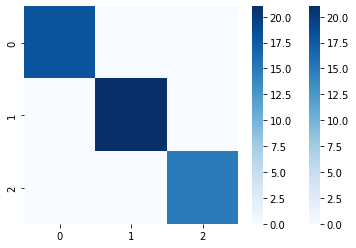

In [153]:
plt_matrix_ovr_l1 = sb.heatmap(matrix_ovr_l1, cmap='Blues')
plt_matrix_ovr_l2 = sb.heatmap(matrix_ovr_l2, cmap='Blues')

In [154]:
print(classification_report(y_test, ovr_l1.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [155]:
print(classification_report(y_test, ovr_l2.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



# 2) Regresión Logística: One vs One

In [156]:
from sklearn.multiclass import OneVsOneClassifier

In [157]:
ovo_l1 = OneVsOneClassifier(model_l1)
ovo_l2 = OneVsOneClassifier(model_l2)

In [158]:
# Entrenando los modelos
ovo_l1.fit(X_train, y_train)
print('Training accuracy:', ovo_l1.score(X_train, y_train))
print('Test accuracy:', ovo_l1.score(X_test, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


In [159]:
ovo_l2.fit(X_train, y_train)
print('Training accuracy:', ovo_l2.score(X_train, y_train))
print('Test accuracy:', ovo_l2.score(X_test, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


Al igual que con los modelos 'ovr' se obtienenn prácticamente los mismos resultados para L1 y L2

---




In [160]:
# Evaluando los modelos

In [161]:
matrix_ovo_l1 = confusion_matrix(y_test, ovo_l1.predict(X_test))
matrix_ovo_l2 = confusion_matrix(y_test, ovo_l2.predict(X_test))

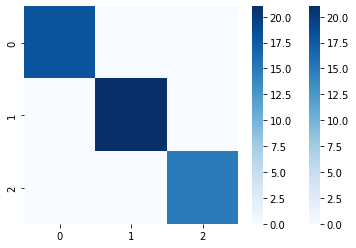

In [162]:
plt_matrix_ovo_l1 = sb.heatmap(matrix_ovo_l1, cmap='Blues')
plt_matrix_ovo_l2 = sb.heatmap(matrix_ovo_l2, cmap='Blues')

# 3) KNN Classifier

In [163]:
#1 Importando el modelo (knn regresor)
from sklearn.neighbors import KNeighborsClassifier

In [164]:
#2 Definiendo la instancia del modelo, es decir configurando y/o personalizando el modelo
knn = KNeighborsClassifier()

In [165]:
#3 Entrenando el modelo con la Matriz 'X' y el vector 'y'
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [166]:
#4 Predecir los valores de los mismos datos de entrenamiento
y_pred_knn = knn.predict(X_train)
y_pred_knn

array([3, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 3, 3, 1, 3, 2, 1, 3, 3, 2, 1,
       2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 2, 3, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 1, 1, 2, 2, 3, 1, 3, 1, 2, 2,
       2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2])

In [167]:
#5 Calcular R2
score_knn = knn.score(X_train,y_train)
score_knn

0.967741935483871

In [168]:
matrix_knn = confusion_matrix(y_test, knn.predict(X_test))
matrix_knn

array([[18,  0,  0],
       [ 1, 19,  1],
       [ 0,  0, 15]])

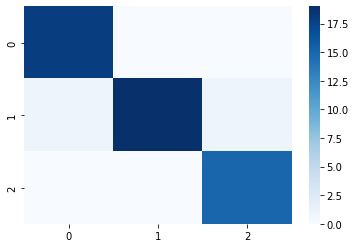

In [169]:
plt_matrix_knn = sb.heatmap(matrix_knn, cmap='Blues')

# 4) Random Forest

In [170]:
# Importando la librería
from sklearn.ensemble import RandomForestClassifier

In [171]:
clf = RandomForestClassifier()

In [172]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
#4 Predecir los valores de los mismos datos de entrenamiento
y_pred_clf = clf.predict(X_train)
y_pred_clf

array([3, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 1,
       2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 2, 2, 3, 1, 2, 1, 2, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 1, 1, 2, 2, 3, 1, 3, 1, 2, 2,
       2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2])

In [174]:
# calcular la precisión de clasificación
score_clf = clf.score(X_test, y_test)
score_clf

1.0

In [175]:
clf.feature_importances_

array([0.1012301 , 0.02974683, 0.0073909 , 0.02176814, 0.02784444,
       0.05871135, 0.15892931, 0.01246628, 0.01878553, 0.1972084 ,
       0.07126589, 0.1029373 , 0.19171552])

In [176]:
importancia_clf = pd.DataFrame(
                            {'predictor': df.drop(columns = "Class label").columns,
                             'importancia': clf.feature_importances_}
                            )
importancia_clf.sort_values('importancia', ascending=False)

,predictor,importancia
9,Color intensity,0.197208
12,Proline,0.191716
6,Flavanoids,0.158929
11,OD280/OD315 of diluted wines,0.102937
0,Alcohol,0.101230
10,Hue,0.071266
5,Total phenols,0.058711
1,Malic acid,0.029747
4,Magnesium,0.027844
3,Alcalinity of ash,0.021768


# Conclusiones

---
Extrañamente todos los modelos me dieron prácticamente los mismos resultados, a excepción del 'knn' que fue el "peor" con R2=0.96.
Pero en particular me gusta más 'Random Forest' porque puedo evaluar fácilmente la importancia de las variables.
